# Este dataset simula los datos de un centro de salud

## Nombres, Apellidos, Países, Especialidades, Diagnósticos Posibles

Este dataset contiene los siguientes campos clave:

### Nombres:
Una lista de nombres comunes que se asignan aleatoriamente a los pacientes.

### Apellidos:
Una lista de apellidos comunes que se asignan aleatoriamente a los pacientes.

### Países:
Se utiliza una lista de países para asignar aleatoriamente un país de residencia a cada paciente.

### Especialidades:
Este campo representa las especialidades médicas disponibles en el centro de salud, que se asignan aleatoriamente a las citas de los pacientes.

### Diagnósticos Posibles:
Un conjunto predefinido de diagnósticos que se asignan aleatoriamente a los pacientes en función de sus citas.



In [2]:
import pandas as pd
import random

# Datos base para generación aleatoria
nombres = ['Ana', 'Luis', 'Carla', 'Pedro', 'María', 'Jorge', 'Lucía', 'Diego', 'Elena', 'Tomás']
apellidos = ['Pérez', 'Gómez', 'Ruiz', 'López', 'Martínez', 'Sánchez', 'Díaz', 'Romero', 'Vargas', 'Morales']
paises = ['España', 'México', 'Argentina', 'Chile', 'Colombia', 'Perú', 'Ecuador', 'Uruguay', 'Bolivia', 'Paraguay']
especialidades = ['Medicina General', 'Cardiología', 'Ginecología', 'Pediatría', 'Dermatología']
diagnosticos_posibles = ['Gripe', 'Hipertensión', 'Quiste ovárico', 'Alergia', 'Diabetes tipo 2', 'Asma', 'Migraña', 'Covid-19']

# Generar 50 pacientes
pacientes = []
citas = []
diagnosticos = []
tratamientos = []

for i in range(1, 51):
    nombre = f"{random.choice(nombres)} {random.choice(apellidos)}"
    edad = random.randint(1, 90)
    sexo = random.choice(['F', 'M'])
    telefono = ''.join([str(random.randint(0, 9)) for _ in range(9)])
    pais = random.choice(paises)

    pacientes.append({
        'ID_Paciente': i,
        'Nombre': nombre,
        'Edad': edad,
        'Sexo': sexo,
        'Teléfono': telefono,
        'País': pais
    })

    id_cita = 100 + i
    fecha = f"2025-05-{random.randint(10, 28):02d}"
    hora = f"{random.randint(8, 16)}:{random.choice(['00', '15', '30', '45'])}"
    especialidad = random.choice(especialidades)

    citas.append({
        'ID_Cita': id_cita,
        'ID_Paciente': i,
        'Fecha': fecha,
        'Hora': hora,
        'Especialidad': especialidad
    })

    id_diagnostico = 200 + i
    diagnostico_txt = random.choice(diagnosticos_posibles)

    diagnosticos.append({
        'ID_Diagnóstico': id_diagnostico,
        'ID_Cita': id_cita,
        'Diagnóstico': diagnostico_txt
    })

    id_tratamiento = 300 + i
    tratamiento_txt = f"Tratamiento para {diagnostico_txt.lower()}"

    tratamientos.append({
        'ID_Tratamiento': id_tratamiento,
        'ID_Diagnóstico': id_diagnostico,
        'Tratamiento': tratamiento_txt
    })

# Convertir a DataFrames
df_pacientes = pd.DataFrame(pacientes)
df_citas = pd.DataFrame(citas)
df_diagnosticos = pd.DataFrame(diagnosticos)
df_tratamientos = pd.DataFrame(tratamientos)

# Mostrar los datasets
print("PACIENTES")
print(df_pacientes.head())

print("\nCITAS")
print(df_citas.head())

print("\nDIAGNÓSTICOS")
print(df_diagnosticos.head())

print("\nTRATAMIENTOS")
print(df_tratamientos.head())




PACIENTES
   ID_Paciente         Nombre  Edad Sexo   Teléfono      País
0            1    Lucía Pérez    31    F  796540047  Paraguay
1            2   Luis Morales    76    F  410644522    México
2            3       Ana Ruiz    73    F  012088467  Paraguay
3            4    Diego López    43    F  845025960    México
4            5  Lucía Morales    50    F  607411057    México

CITAS
   ID_Cita  ID_Paciente       Fecha   Hora      Especialidad
0      101            1  2025-05-21  11:15  Medicina General
1      102            2  2025-05-28   9:30  Medicina General
2      103            3  2025-05-18  14:00       Cardiología
3      104            4  2025-05-15  13:30       Cardiología
4      105            5  2025-05-10  10:30  Medicina General

DIAGNÓSTICOS
   ID_Diagnóstico  ID_Cita      Diagnóstico
0             201      101          Migraña
1             202      102            Gripe
2             203      103   Quiste ovárico
3             204      104  Diabetes tipo 2
4          

## Distribución de Géneros por País

Este gráfico muestra la distribución de géneros (masculino y femenino) de los pacientes en función de su país de residencia.

- El eje **X** representa los países.
- El eje **Y** muestra la cantidad de pacientes por género en cada país.
- Las barras están coloreadas según el género, usando diferentes colores para distinguirlos.

El gráfico permite observar las diferencias en la distribución de géneros entre los países del dataset.


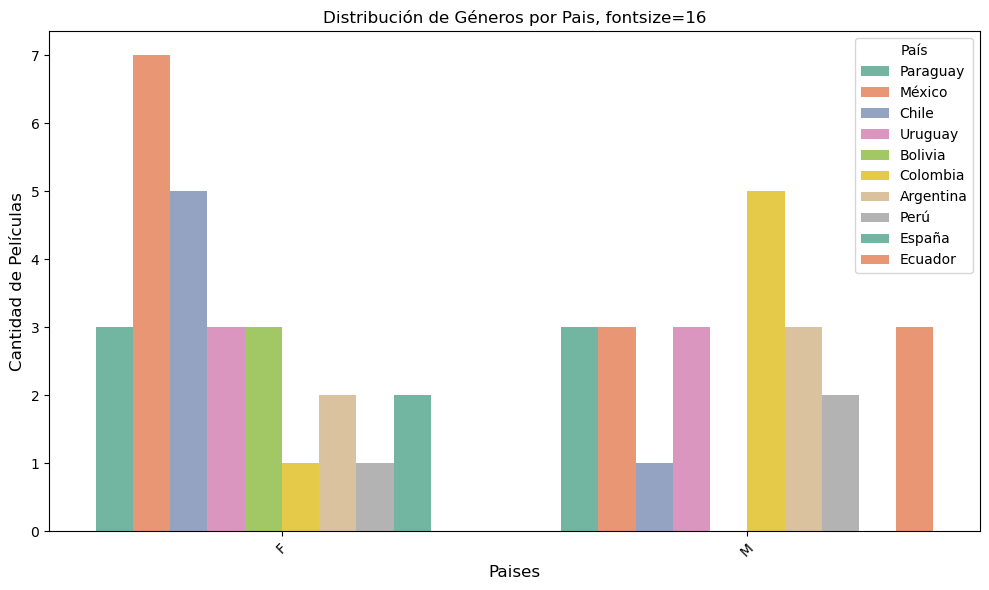

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.countplot(x="Sexo", hue="País", data=df_pacientes, palette="Set2" )

# Títulos y etiquetas
plt.title("Distribución de Géneros por Pais, fontsize=16")
plt.xlabel("Paises", fontsize=12)
plt.ylabel("Cantidad de Películas", fontsize=12)
plt.xticks(rotation=45)

          
# Mostrar gráfico
plt.tight_layout()
plt.show()

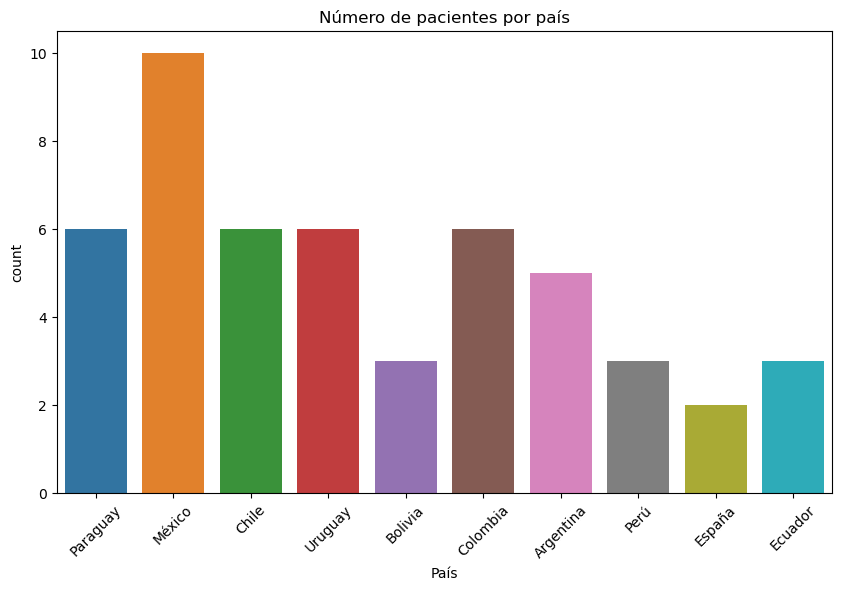

In [5]:
# Número de pacientes por país
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pacientes, x='País')
plt.title('Número de pacientes por país')
plt.xticks(rotation=45)
plt.show()


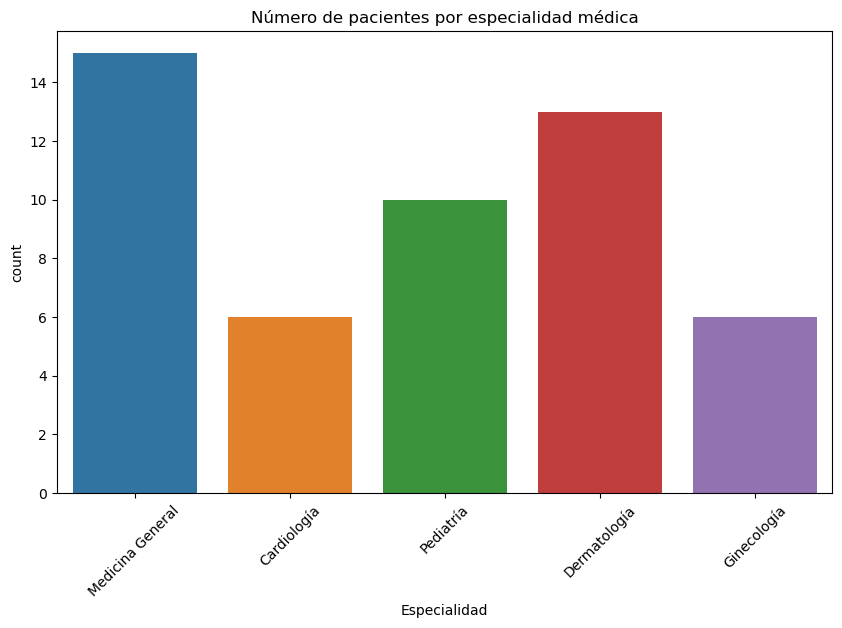

In [6]:
# Número de pacientes por especialidad médica
# Primero, unimos las tablas df_pacientes y df_citas para obtener la especialidad por paciente
df_pacientes_citas = pd.merge(df_pacientes, df_citas, on='ID_Paciente')

plt.figure(figsize=(10, 6))
sns.countplot(data=df_pacientes_citas, x='Especialidad')
plt.title('Número de pacientes por especialidad médica')
plt.xticks(rotation=45)
plt.show()


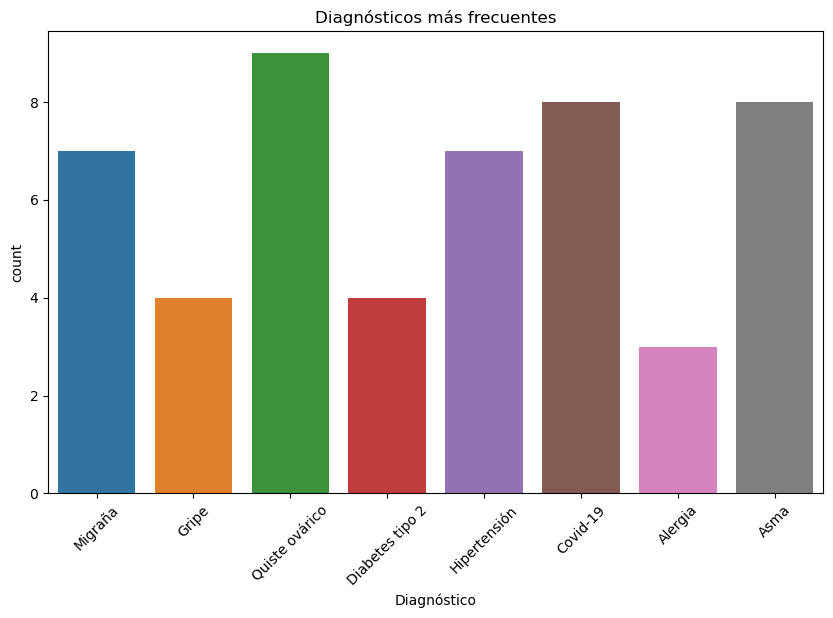

In [7]:
# Diagnósticos más frecuentes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_diagnosticos, x='Diagnóstico')
plt.title('Diagnósticos más frecuentes')
plt.xticks(rotation=45)
plt.show()


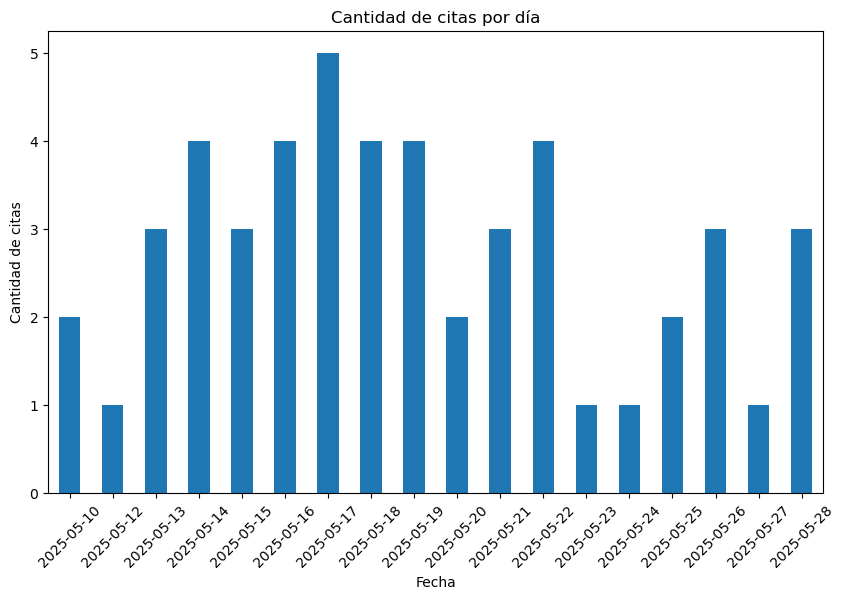

In [14]:
# Convertir la fecha a un formato datetime
df_citas['Fecha'] = pd.to_datetime(df_citas['Fecha'])

# Cantidad de citas por día
plt.figure(figsize=(10, 6))
df_citas['Fecha'].dt.date.value_counts().sort_index().plot(kind='bar')
plt.title('Cantidad de citas por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de citas')
plt.xticks(rotation=45)
plt.show()




ValueError: min() arg is an empty sequence

<Figure size 1200x600 with 0 Axes>

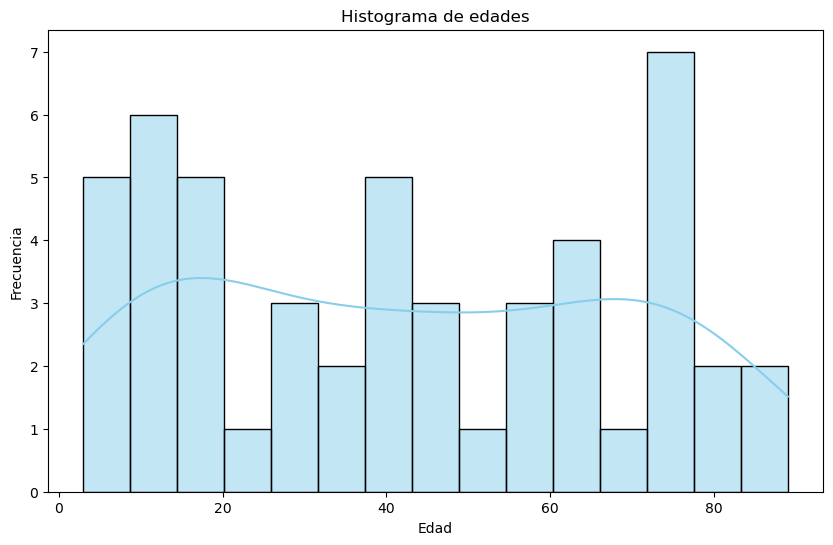

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(df_pacientes['Edad'], kde=True, bins=15, color='skyblue')
plt.title('Histograma de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


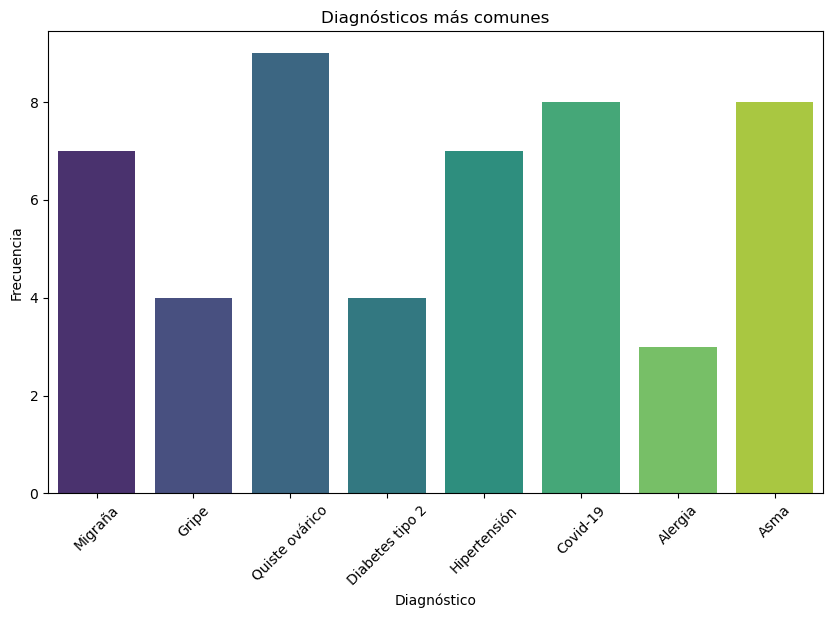

In [16]:
# Gráfico de barras para los diagnósticos más comunes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_diagnosticos, x='Diagnóstico', palette='viridis')
plt.title('Diagnósticos más comunes')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


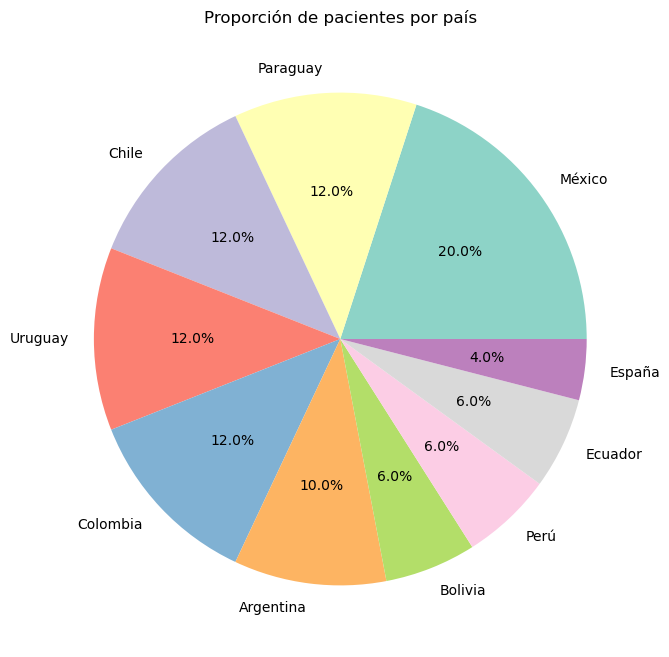

In [17]:
# Pie chart con proporción de pacientes por país
pais_counts = df_pacientes['País'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(pais_counts, labels=pais_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3', len(pais_counts)))
plt.title('Proporción de pacientes por país')
plt.show()
